<a href="https://colab.research.google.com/github/YaswanthVarma754/Housing-DataBlitz/blob/main/Housing_DataBlitz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics

# **1. Load the dataset**

In [29]:
df = pd.read_csv("/content/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [30]:
df.shape

(20640, 10)

In [31]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## 2. Removing null values
Filling the null values using mean of total bedrooms column. 

In [33]:
mean_total_bedrooms = df['total_bedrooms'].mean()

In [34]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(value = mean_total_bedrooms)

In [35]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## 3. Converting string values to integer values
by creating a list and using if conditions converted the string values to integer values

In [52]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [53]:
ocean = []
for i in df['ocean_proximity']:
  if i == 'NEAR BAY':
    ocean.append(0)
  elif i == '<1H OCEAN':
    ocean.append(1)
  elif i == 'INLAND':
    ocean.append(2)
  elif i == 'NEAR OCEAN':
    ocean.append(3)
  else:
    ocean.append(4)



In [55]:
df['ocean_proximity'] = ocean

In [56]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0


## 4. Find correlation to reduce dimensions
the correlation between total_bedrooms and total_rooms is high and the correlation between population and households is high, so dropped both total_rooms and population columns. 

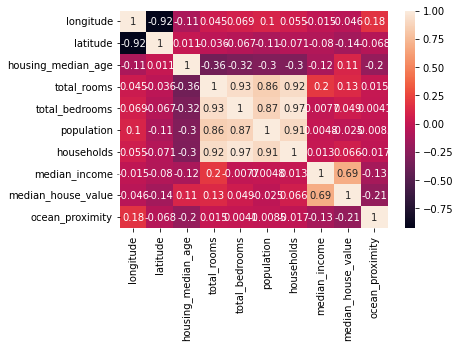

In [57]:
sns.heatmap(df.corr(), annot = True)
plt.show()

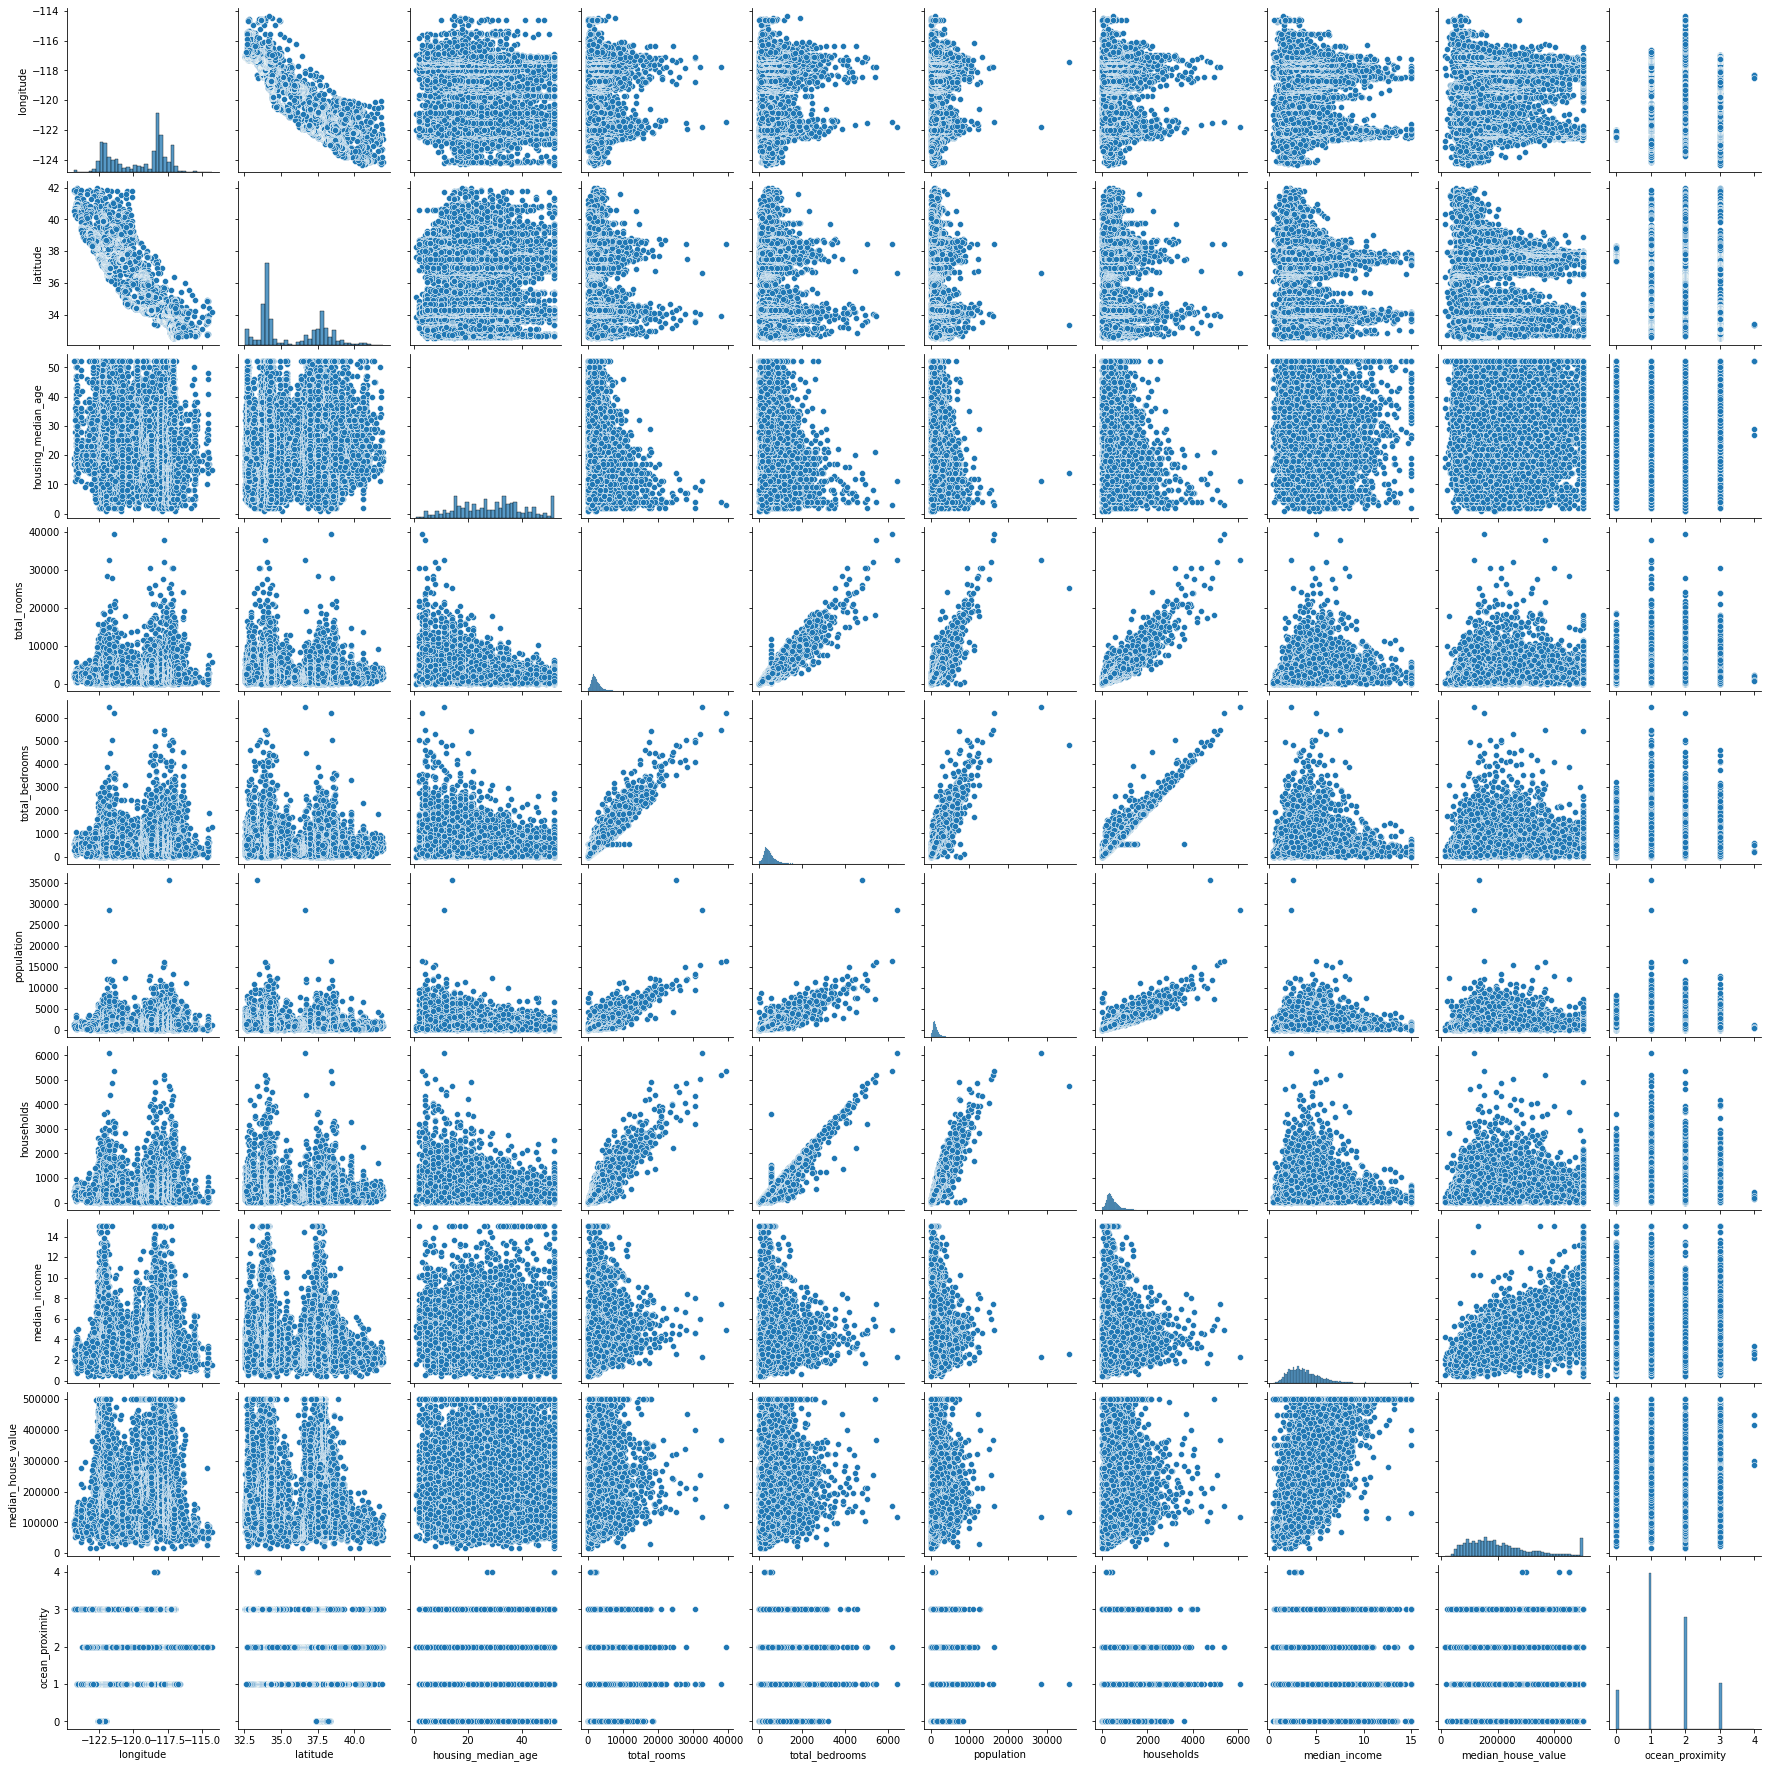

In [58]:
sns.pairplot(df)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


In [60]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
# x = df['latitude', 'longitude', 'housing_median_age', 'total_bedrooms', 'households', 'median_income']
# y = df['median_house_value']

In [62]:
df.drop(df[['total_rooms', 'population']], axis =1, inplace = True)
df.head()
# df[['total_rooms', 'median_house_value']]

,longitude,latitude,housing_median_age,total_bedrooms,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,129.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,1106.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,190.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,235.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,280.0,259.0,3.8462,342200.0,0


In [67]:
y = df['median_house_value']
X = df.drop(['median_house_value'], axis = 1)

In [68]:
X.head()

,longitude,latitude,housing_median_age,total_bedrooms,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,129.0,126.0,8.3252,0
1,-122.22,37.86,21.0,1106.0,1138.0,8.3014,0
2,-122.24,37.85,52.0,190.0,177.0,7.2574,0
3,-122.25,37.85,52.0,235.0,219.0,5.6431,0
4,-122.25,37.85,52.0,280.0,259.0,3.8462,0


## 5. Splitting the data for training and testing
Split the dataset for traing and testing of 80 and 20 percent respectively.

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [71]:
X_train.shape

(16512, 7)

In [72]:
y_train.shape

(16512,)

## 6. Fitting the train and test dataset with LinearRegression model

In [76]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [83]:
# accuracy = metrics.accuracy_score(X_train, y_train)
# accuracy
model.score(X_train, y_train)

0.6031549506071913